In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pf
from lsst.daf.butler import Butler
from lsst.ip.isr import IsrTask, IsrTaskConfig
from lsst.summit.utils.plotting import plot
import lsst.afw.cameraGeom.utils as camGeomUtils
import lsst.afw.math as afwMath
import lsst.afw.display as afwDisplay

In [2]:
butler = Butler('embargo_new', collections=['LSSTCam/raw/all', 'LSSTCam/calib/unbounded'])

In [3]:
butler.registry.queryCollections('*E1146*')

['u/lsstccs/bias_E1146_w_2024_35/20240930T125026Z',
 'u/lsstccs/dark_E1146_w_2024_35/20240930T131900Z',
 'u/lsstccs/flat_E1146_w_2024_35/20240930T134029Z',
 'u/lsstccs/defects_E1146_w_2024_35/20240930T135015Z',
 'u/lsstccs/ptc_E1146_w_2024_35/20240930T140049Z',
 'u/lsstccs/eo_read_noise_E1146_w_2024_35/20240930T144850Z',
 'u/lsstccs/eo_dark_current_E1146_w_2024_35/20240930T145047Z',
 'u/lsstccs/eo_eper_E1146_w_2024_35/20240930T145104Z',
 'u/lsstccs/eo_ptc_plots_E1146_w_2024_35/20240930T145123Z',
 'u/lsstccs/eo_linearity_plots_E1146_w_2024_35/20240930T145222Z',
 'u/lsstccs/eo_bf_analysis_E1146_w_2024_35/20240930T145259Z',
 'u/lsstccs/eo_raft_lambda_mosaics_E1146_w_2024_35/20240930T145202Z',
 'u/lsstccs/eo_divisadero_tearing_E1146_w_2024_35/20240930T145243Z',
 'u/lsstccs/eo_cti_vs_flux_E1146_w_2024_35/20240930T145316Z',
 'u/lsstccs/eo_bright_defects_E1146_w_2024_35/20240930T144954Z',
 'u/lsstccs/eo_persistence_E1146_w_2024_35/20240930T145339Z',
 'u/lsstccs/eo_bias_shifts_E1146_w_2024_35/

In [8]:
E1113, # regular
E1212, # 5%
E1154, # non
E1247 # half

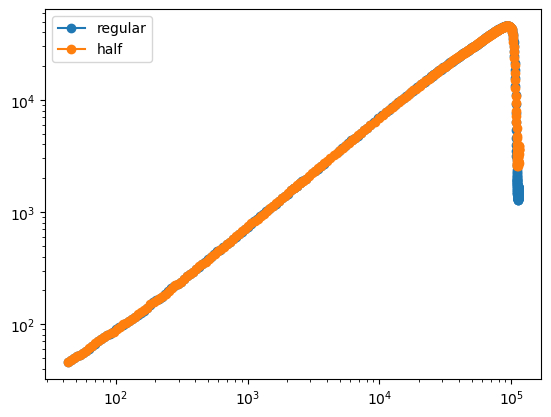

In [19]:
amp='C00'
for run, name in [
    ( 'E1113', 'regular'),
    ( 'E1212', '5%'),
    ( 'E1154', 'non'),        
    ( 'E1247', 'half'),       
    ]:
    try:
        ptc = butler.get('ptc',instrument='LSSTCam',detector=94,collections=f'u/lsstccs/ptc_{run}_w_2024_35')
        plt.plot(ptc.rawMeans[amp], ptc.rawVars[amp],'-o',label=name)
    except:
        pass

plt.loglog()
plt.legend()